In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# parts of speech of interest for text analysis
POS = [
    'NNS',   # plural nouns
    'PRP',   # personal pronouns
    'PRP$',  # possessive pronouns
    'VB',    # verbs
    'VBD',   # past tense verbs
    'VBG',   # gerund verbs
    'VBN',   # past participle verbs
    'VBP',   # present verbs
    'VBZ',   # 3rd person verbs
    'UH'     # interjection
]

# negative, neutral, positive, compound sentiment
SENTIMENT = ['neg', 'neu', 'pos', 'compound']

AUDIO_FEATURES = ['SPEECH_RATE', 'MAX_FREQ', 'MIN_FREQ', 'AVG_FREQ', 'PAUSES']

EYE_MOVEMENT = ['BPM', 'EYEMOV']
FEATURES = AUDIO_FEATURES + POS + SENTIMENT + EYE_MOVEMENT

In [69]:
def read_file(filename):
    test_data = []
    f = open(filename, 'r')

    first = True
    for line in f:
        if first:
            first = False
            continue

        words = line.strip().split(" ")
        test_data.append(words[1])

    f.close()
    return test_data

# load data
def load_df(subject_dir, nfiles, ntests):
    array = []
    ground = open(subject_dir + 'ground.txt', 'r')

    for i in range(1, nfiles + 1):
        test_data = read_file(subject_dir + str(i) + '.txt')
        test_data.append(ground.readline().strip())
        array.append(test_data)

    ground.close()
    df = pd.DataFrame(array, columns=FEATURES + ['GT'])
    return df

## Subject 4

In [86]:
df = load_df('test-data/subject4/', 19, 4)
df

,SPEECH_RATE,MAX_FREQ,MIN_FREQ,AVG_FREQ,PAUSES,NNS,PRP,PRP$,VB,VBD,...,VBP,VBZ,UH,neg,neu,pos,compound,BPM,EYEMOV,GT
0,103.96039603960396,300.2636411330499,114.90308207718824,193.82091599985318,1,0.0,0.16,0.0,0.08,0.04,...,0.12,0.04,0.0,0.0,0.908,0.092,0.2057,30.95442820292347,6882,No
1,125.17385257301808,259.4252432041837,125.97898632450308,180.5974704778217,0,0.1,0.06666666666666667,0.03333333333333333,0.03333333333333333,0.0,...,0.06666666666666667,0.0,0.0,0.0,0.912,0.088,0.4023,37.552155771905426,1674,Yes
2,136.49851632047478,245.05009311260886,114.02381565143318,187.53480362555376,0,0.0,0.15384615384615385,0.038461538461538464,0.038461538461538464,0.0,...,0.15384615384615385,0.0,0.0,0.0,0.641,0.359,0.8779,59.34718100890208,1664,Yes
3,57.692307692307686,284.96382104190593,98.12868492773441,173.07085907081992,2,0.0,0.16666666666666666,0.0,0.0,0.0,...,0.16666666666666666,0.0,0.0,0.355,0.645,0.0,-0.296,48.07692307692307,1785,Yes
4,137.2549019607843,280.00149665807186,102.67931705322724,190.16652560052592,1,0.047619047619047616,0.19047619047619047,0.0,0.09523809523809523,0.0,...,0.09523809523809523,0.0,0.0,0.144,0.856,0.0,-0.4341,52.287581699346404,2277,Yes
5,100.84033613445379,228.43342266835322,118.52231255054869,171.0118319131274,1,0.0,0.14285714285714285,0.0,0.0,0.0,...,0.14285714285714285,0.0,0.0,0.0,1.0,0.0,0.0,50.420168067226896,1053,No
6,93.65244536940688,290.17686192083596,113.63880853234778,184.07052173172488,1,0.0625,0.1875,0.0625,0.0625,0.0,...,0.125,0.0,0.0,0.179,0.648,0.173,-0.0207,62.434963579604585,1083,Yes
7,179.1044776119403,278.65310178624037,93.56005499048875,182.3174900150137,1,0.029411764705882353,0.16176470588235295,0.029411764705882353,0.07352941176470588,0.10294117647058823,...,0.014705882352941176,0.0,0.0,0.0,0.91,0.09,0.6542,73.27001356852104,2244,No
8,122.72727272727272,269.51876063910777,114.16991585075326,186.03513639308048,2,0.047058823529411764,0.15294117647058825,0.011764705882352941,0.03529411764705882,0.011764705882352941,...,0.07058823529411765,0.023529411764705882,0.0,0.078,0.713,0.209,0.8858,48.484848484848484,2665,No
9,136.71672708441224,245.33295440737191,119.43683232754525,184.56811439080641,2,0.043478260869565216,0.1956521739130435,0.021739130434782608,0.043478260869565216,0.0,...,0.10869565217391304,0.08695652173913043,0.0,0.0,0.786,0.214,0.831,55.929570170895914,1972,No


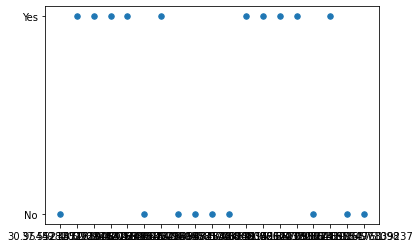

In [71]:
# see distribution
plt.scatter(df['BPM'], df['GT'], s=30)

In [87]:
# Split data
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df[FEATURES]
y = df['GT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [88]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [89]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8333333333333334


## Subject 5

In [81]:
df5 = load_df('test-data/subject5/', 19, 4)
df5

,SPEECH_RATE,MAX_FREQ,MIN_FREQ,AVG_FREQ,PAUSES,NNS,PRP,PRP$,VB,VBD,...,VBP,VBZ,UH,neg,neu,pos,compound,BPM,EYEMOV,GT
0,81.44796380090497,214.16612731995207,0.0,94.20033656095436,1,0.0,0.1,0.1,0.0,0.0,...,0.0,0.1,0.0,0.0,0.748,0.252,0.4019,9.049773755656108,1344,Yes
1,61.98347107438017,438.75869076098496,32.01690033879559,121.20684885607034,1,0.0,0.2,0.0,0.0,0.0,...,0.2,0.0,0.0,0.535,0.465,0.0,-0.3182,12.396694214876034,1248,No
2,126.31578947368423,163.16341528634553,0.0,109.16300636417985,0,0.1111111111111111,0.1111111111111111,0.0,0.1111111111111111,0.0,...,0.1111111111111111,0.0,0.0,0.26,0.74,0.0,-0.2755,15.78947368421053,1664,No
3,78.60262008733625,180.3341901970381,0.0,136.04444304843742,0,0.0,0.3333333333333333,0.0,0.0,0.0,...,0.3333333333333333,0.0,0.0,0.0,1.0,0.0,0.0,26.200873362445414,9324,No
4,59.90016638935108,208.35762989075357,32.00361731498028,113.86398095412858,0,0.0,0.16666666666666666,0.0,0.0,0.16666666666666666,...,0.0,0.0,0.0,0.0,0.517,0.483,0.4215,19.966722129783694,1332,No
5,51.79282868525896,257.6731415672054,32.028187132997175,89.82341322041917,1,0.0,0.07692307692307693,0.0,0.0,0.0,...,0.07692307692307693,0.07692307692307693,0.0,0.136,0.556,0.309,0.4215,15.936254980079681,4128,No
6,69.36416184971098,210.52575746111958,0.0,56.47689947779354,0,0.0,0.5,0.0,0.0,0.0,...,0.25,0.0,0.0,0.0,0.426,0.574,0.4019,17.341040462427745,816,No
7,93.10344827586206,260.36586835857645,32.10281870042709,117.73350497423651,1,0.2222222222222222,0.1111111111111111,0.0,0.1111111111111111,0.1111111111111111,...,0.0,0.0,0.0,0.269,0.504,0.227,-0.128,31.03448275862069,870,No
8,26.923076923076923,296.2503952310757,32.104775143931576,128.7249282406999,1,0.0,0.42857142857142855,0.0,0.0,0.2857142857142857,...,0.14285714285714285,0.0,0.0,0.0,1.0,0.0,0.0,15.384615384615383,1980,No
9,19.736842105263158,250.5068747010834,0.0,74.82952327559056,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.296,19.736842105263158,580,No


In [82]:
X5 = df5[FEATURES]
y5 = df5['GT']

X_train, X_test, y_train, y_test = train_test_split(X5, y5, test_size=0.3, random_state=1) # 70% training and 30% test
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0
